# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [46]:
pip install pdfplumber

   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.6 MB 5.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.1/5.6 MB 5.3 MB/s eta 0:00:01
   ---------------------- ----------------- 3.1/5.6 MB 5.4 MB/s eta 0:00:01
   ------------------------------- -------- 4.5/5.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.9 MB 5.6 MB/s eta 0:00:01
   -------------------------------- ------- 2.4/2.9 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber as pdf1

In [105]:
arquivo_csv = r'\Users\Meu Computador\anaconda3\@ EBAC\Descritiva 1\Atividade 1 - Sinasc.csv'
sinasc_csv = pd.read_csv(arquivo_csv)
sinasc_csv.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [66]:
arquivo_pdf = r'\Users\Meu Computador\anaconda3\@ EBAC\Descritiva 1\Atividade 1 - SINASC.pdf'
with pdf1.open(arquivo_pdf) as pdf:
    texto_total = ""
    for pagina in pdf.pages:
        sinasc_pdf = pagina.extract_text()

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

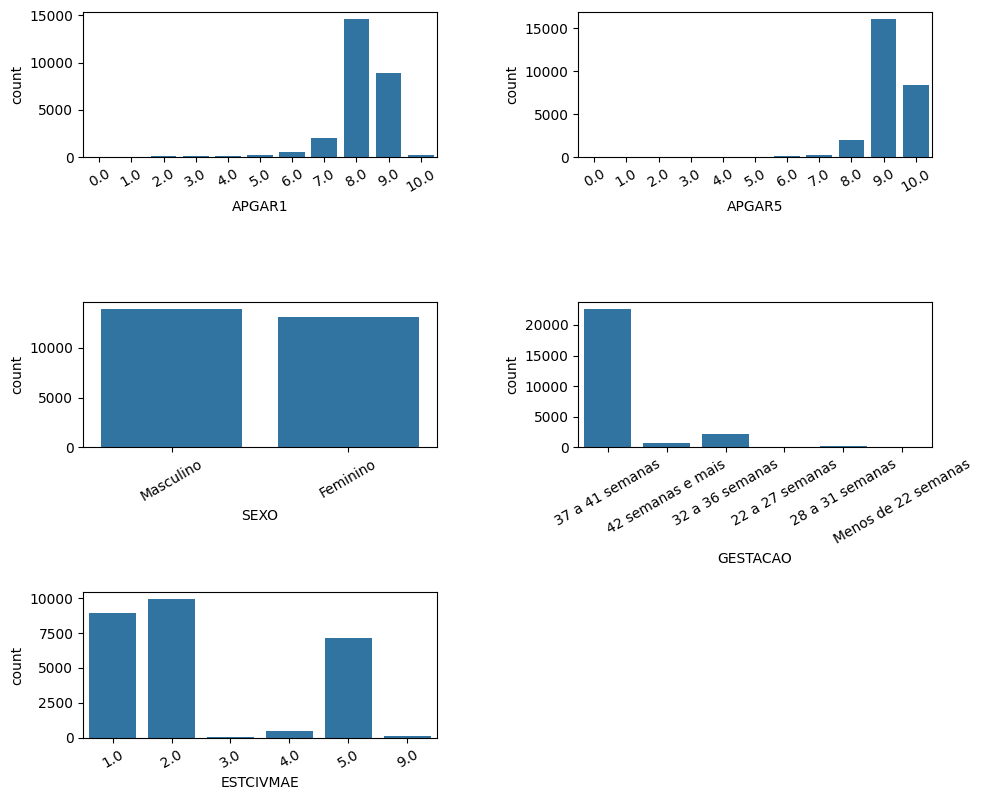

In [171]:
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(3, 2)

ax1 = sns.countplot(ax = axes[0, 0], x='APGAR1', data=sinasc_csv)
ax2 = sns.countplot(ax = axes[0, 1], x='APGAR5', data=sinasc_csv)
ax3 = sns.countplot(ax = axes[1, 0], x='SEXO', data=sinasc_csv)
ax4 = sns.countplot(ax = axes[1, 1], x='GESTACAO', data=sinasc_csv)
ax5 = sns.countplot(ax = axes[2, 0], x='ESTCIVMAE', data=sinasc_csv)
fig.delaxes(axes[2, 1])
plt.tight_layout()

fig.subplots_adjust(hspace=1, wspace=0.4)
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=30)

plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [119]:
plt.close('all')

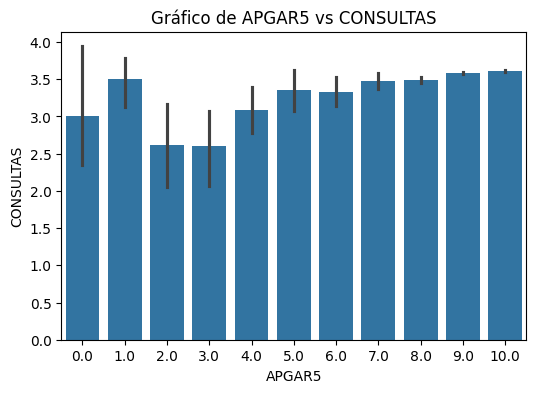

In [133]:
plt.figure(figsize=(6, 4))
sns.barplot(x='APGAR5', y='CONSULTAS', data=sinasc_csv)
plt.title('Gráfico de APGAR5 vs CONSULTAS')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

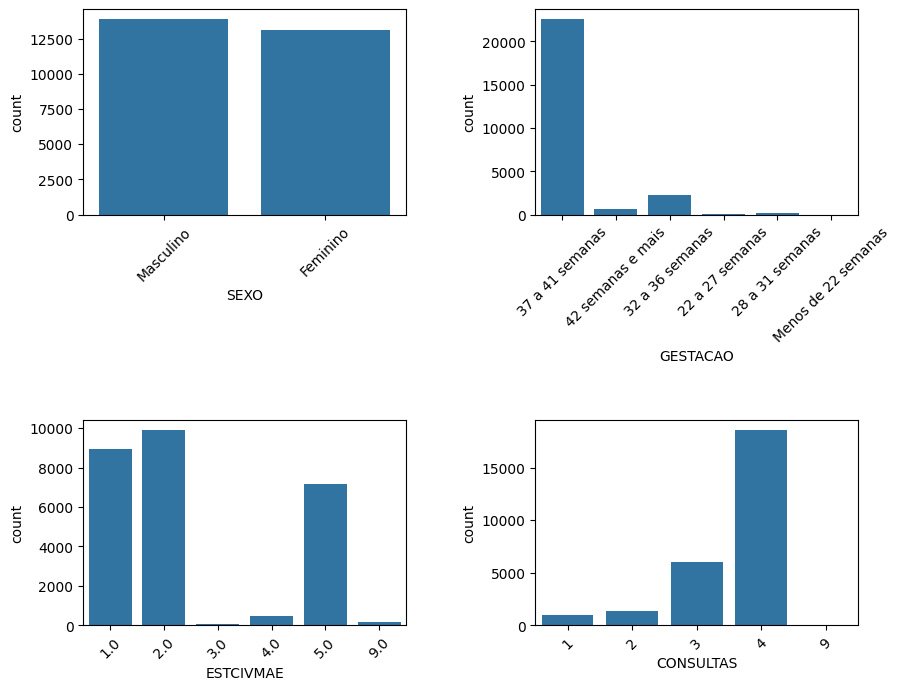

In [161]:
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='SEXO', data=sinasc_csv)
sns.countplot(ax = axes[0, 1], x='GESTACAO', data=sinasc_csv)
sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data=sinasc_csv)
sns.countplot(ax = axes[1, 1], x='CONSULTAS', data=sinasc_csv)


fig.subplots_adjust(hspace=1, wspace=0.4)
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)